# Generate a masked catalog projected on the sky

This demo loads an angular mask in Healpix format along with a tabulated radial density profile n(z)
and generates a mock galaxy catalog.

The output catalog has the angular coordinates RA, Dec, the cosmological redshift and the redshift with the peculiar velocity component.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import healpy

from scipy import interpolate

import logging
logging.basicConfig(level=logging.INFO)

import synmock.lncat, synmock.model

In [2]:
z, nz = np.loadtxt("cmass_nofz.txt", unpack=True)
nofz = interpolate.interp1d(z, nz, bounds_error=False, fill_value=0)
mask = healpy.read_map("cmass_mask.fits", dtype=int)

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [3]:
model = synmock.model.ModelPk(Omega_cdm=0.25, Omega_b=0.05, h=0.69)


In [4]:
lncat = synmock.lncat.LogNormCat(model, nofz=nofz, box_length=4096, cell_size=32)

In [5]:
cat = lncat.skycoord

INFO:synmock.model:Computing power spectrum with Class code
INFO:synmock.model:          z: 0.7
INFO:synmock.model:    sigma_8: 0.8497692589973953
INFO:synmock.model: sigma_8(z): 0.5959805024044199
INFO:synmock.model:       f(z): 0.8078988401327202
INFO:synmock.model:f sigma8(z): 0.4814919566342467


logk min -9.210340371976182


In [6]:
ra,dec,z,zs = np.transpose(cat)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


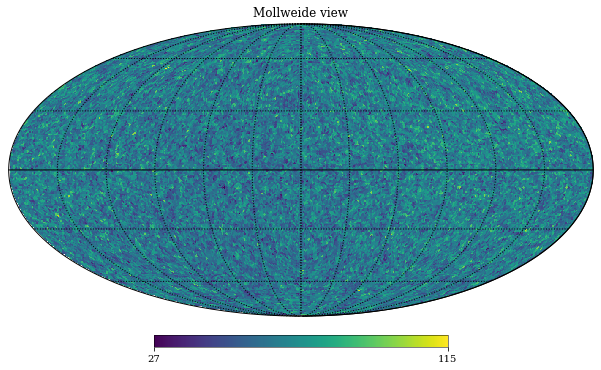

In [7]:
nside = 64
pix = healpy.ang2pix(nside, ra, dec, lonlat=True)
map = np.zeros(12*nside**2)
h = np.bincount(pix)
map[:len(h)] = h

healpy.mollview(map, rot=(180, 0))
healpy.graticule()

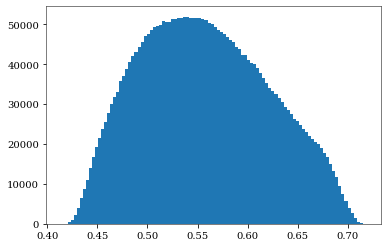

In [8]:
_ = plt.hist(z, bins=100)

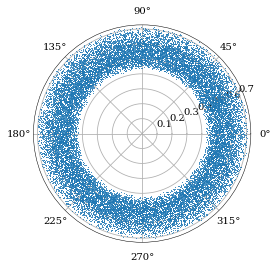

In [9]:
sel = np.abs(dec) < 0.5
plt.polar(ra[sel], z[sel], alpha=0.8,ls="None", marker=",")

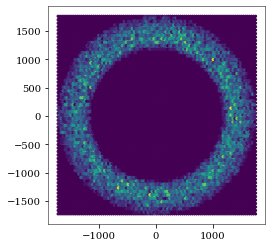

In [10]:
plt.subplot(aspect='equal')
r = [model.comoving_distance(v) for v in z[sel]]
x = r*np.cos(ra[sel]*np.pi/180)
y = r*np.sin(ra[sel]*np.pi/180)
plt.hexbin(x,y)